In [3]:
import torch
from os.path import join
import numpy as np
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from random import randint

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [ ]:
MOT2001_TRAIN_PATH = join('data', 'MOT20', 'train', 'MOT20-01')

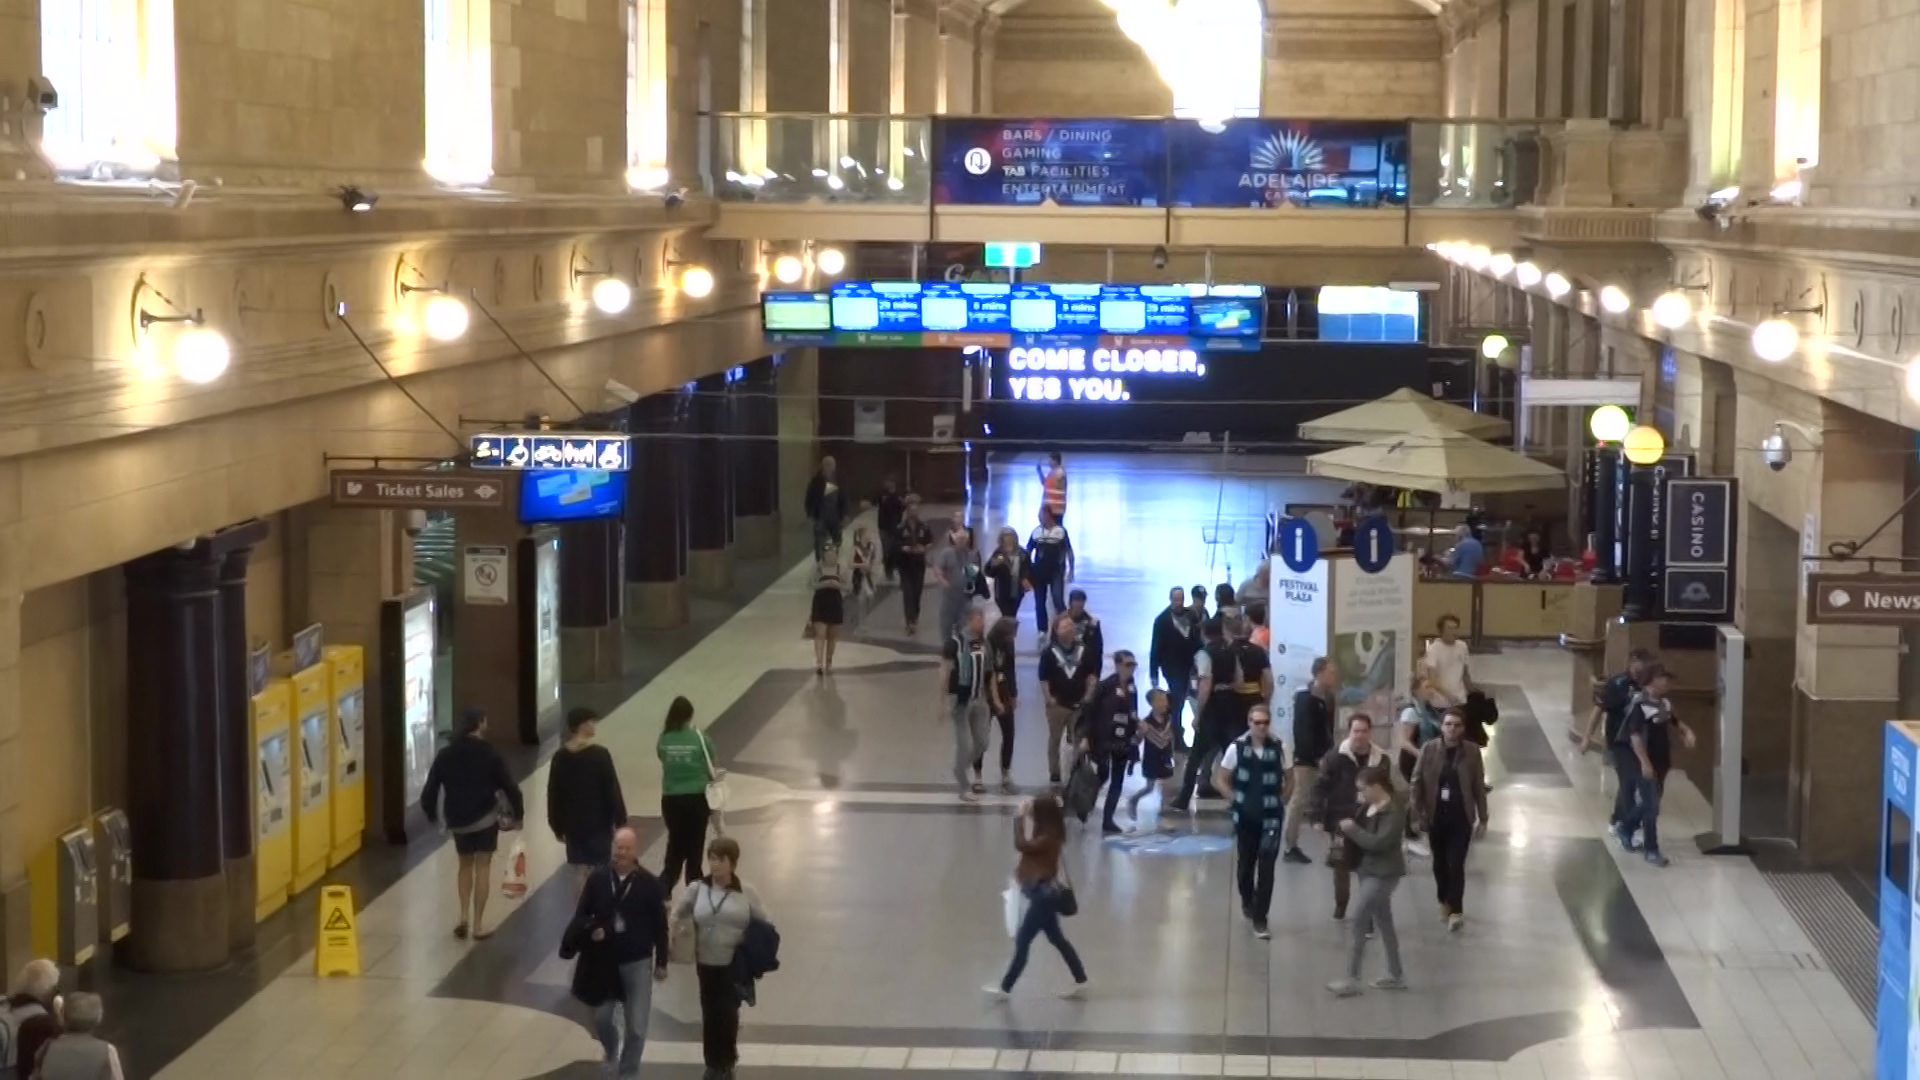

In [ ]:
def get_image_path_by_frame_id(frame_id):
    return join(MOT2001_TRAIN_PATH, 'img1', f'{int(frame_id):06}.jpg')
raw_img = Image.open(get_image_path_by_frame_id(123))
raw_img

In [ ]:
annotations = None
with open(join(MOT2001_TRAIN_PATH, 'gt', 'gt.txt')) as f:
    annotations = pd.DataFrame(list(map(lambda l: np.array(list(map(lambda x: float(x[:-1]) if (x[-1] == '\n') else int(x), l.split(',')))), f.readlines())))
    annotations.columns = ['frame', 'id', 'bb_left', 'bb_top', 'bb_width', 'bb_height', 'flag?', 'class', 'conf']

In [ ]:
annotations

frame    id  bb_left  bb_top  bb_width  bb_height  flag?  class  \
0        1.0   1.0    199.0   813.0     140.0      268.0    1.0    1.0   
1        2.0   1.0    201.0   812.0     140.0      268.0    1.0    1.0   
2        3.0   1.0    203.0   812.0     140.0      268.0    1.0    1.0   
3        4.0   1.0    206.0   812.0     140.0      268.0    1.0    1.0   
4        5.0   1.0    208.0   812.0     140.0      268.0    1.0    1.0   
...      ...   ...      ...     ...       ...        ...    ...    ...   
26642  425.0  90.0      4.0     1.0     500.0      813.0    0.0   11.0   
26643  426.0  90.0      4.0     1.0     501.0      812.0    0.0   11.0   
26644  427.0  90.0      4.0     1.0     502.0      812.0    0.0   11.0   
26645  428.0  90.0      4.0     1.0     503.0      811.0    0.0   11.0   
26646  429.0  90.0      4.0     1.0     505.0      811.0    0.0   11.0   

          conf  
0      0.83643  
1      0.84015  
2      0.84015  
3      0.84015  
4      0.84015  
...        ...  
26642  1.00000  
26643  1.00000  
26644  1.00000  
26645  1.00000  
26646  1.00000  

[26647 rows x 9 columns]

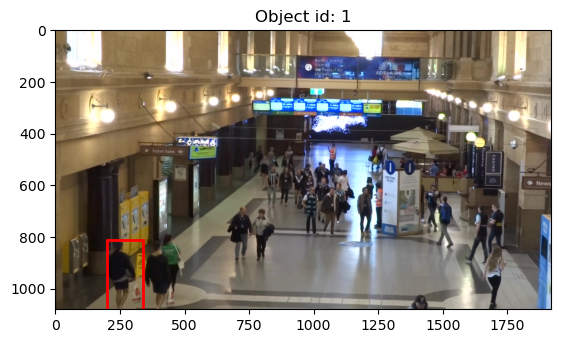

In [ ]:
def show_object_with_bb(object_params):
    x, y, w, h = object_params[2:6].astype(int)
    _, ax = plt.subplots()
    ax.imshow(image)
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.title(f'Object id: {int(object_params[1])}')
    plt.show()

show_object_with_bb(raw_img, annotations.iloc[0])

In [ ]:
def extract_object_data_by_id(id):
    return annotations[annotations['id'] == id]

extract_object_data_by_id(3)

frame   id  bb_left  bb_top  bb_width  bb_height    x    y        z
689     1.0  3.0    399.0   789.0     104.0      259.0  1.0  1.0  0.33773
690     2.0  3.0    401.0   788.0     103.0      259.0  1.0  1.0  0.33321
691     3.0  3.0    404.0   787.0     102.0      259.0  1.0  1.0  0.33981
692     4.0  3.0    407.0   786.0     101.0      259.0  1.0  1.0  0.33627
693     5.0  3.0    410.0   785.0     100.0      259.0  1.0  1.0  0.34227
...     ...  ...      ...     ...       ...        ...  ...  ...      ...
1051  363.0  3.0    434.0   592.0      96.0      179.0  1.0  1.0  0.11254
1052  364.0  3.0    431.0   592.0      96.0      179.0  1.0  1.0  0.11168
1053  365.0  3.0    428.0   591.0      96.0      179.0  1.0  1.0  0.11168
1054  366.0  3.0    425.0   591.0      96.0      179.0  1.0  1.0  0.11082
1055  367.0  3.0    422.0   591.0      96.0      179.0  1.0  1.0  0.11082

[367 rows x 9 columns]

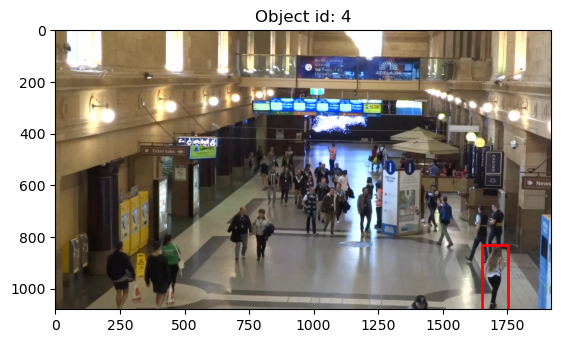

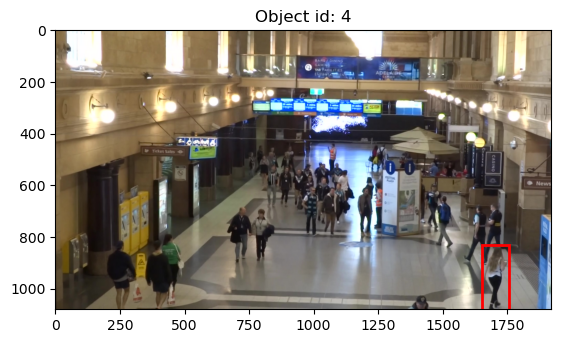

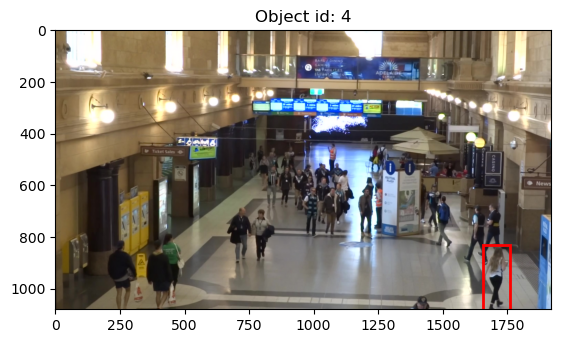

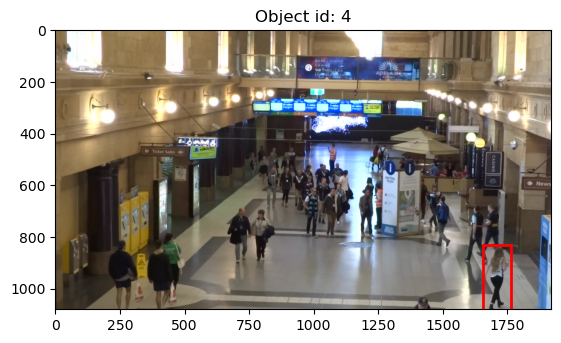

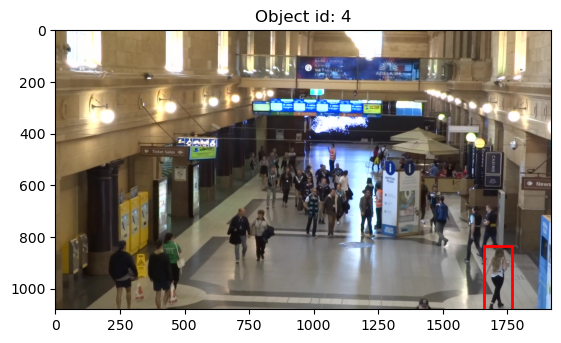

KeyboardInterrupt: 

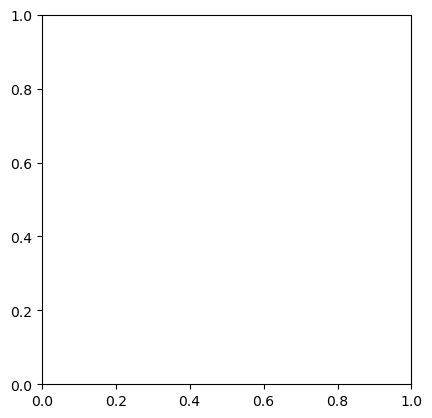

In [ ]:
def draw_all_bb_by_id(id):
    for _, line in extract_object_data_by_id(id).iterrows():
        image = Image.open(get_image_path_by_frame_id(line['frame']))
        show_object_with_bb(image, line.values)

draw_all_bb_by_id(4)

In [ ]:
annotations[annotations['class'] == 7]

frame    id  bb_left  bb_top  bb_width  bb_height  flag?  class  \
2438     1.0   9.0   1232.0   589.0      58.0      182.0    0.0    7.0   
2439     2.0   9.0   1232.0   590.0      58.0      182.0    0.0    7.0   
2440     3.0   9.0   1232.0   591.0      58.0      182.0    0.0    7.0   
2441     4.0   9.0   1232.0   592.0      58.0      182.0    0.0    7.0   
2442     5.0   9.0   1233.0   593.0      58.0      182.0    0.0    7.0   
...      ...   ...      ...     ...       ...        ...    ...    ...   
24584  425.0  85.0   1108.0   445.0      49.0      119.0    0.0    7.0   
24585  426.0  85.0   1109.0   446.0      49.0      119.0    0.0    7.0   
24586  427.0  85.0   1109.0   446.0      49.0      119.0    0.0    7.0   
24587  428.0  85.0   1110.0   446.0      49.0      119.0    0.0    7.0   
24588  429.0  85.0   1111.0   447.0      49.0      119.0    0.0    7.0   

          conf  
2438   0.47458  
2439   0.42929  
2440   0.36890  
2441   0.34056  
2442   0.27832  
...        ...  
24584  0.81433  
24585  0.80867  
24586  0.80550  
24587  0.80833  
24588  0.79767  

[2574 rows x 9 columns]

In [ ]:
# get_image_path_by_frame_id
random_object = annotations.iloc[randint(1, len(annotations))]
x, y, w, h = random_object[2:6].astype(int)
img = Image.open(get_image_path_by_frame_id(random_object[0]))
cropped_img = img.crop(x, x + w, y, y + h)
cropped_img

NameError: name 'annotations' is not defined